In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
plt.rcParams['figure.figsize'] = 10,10
np.random.seed(42)


%matplotlib inline

In [0]:
dataset = np.array([[-7.82, -4.58, -3.97],
                   [-6.68, 3.16, 2.71],
                   [4.36, -2.19, 2.09],
                   [6.72, 0.88, 2.80],
                   [-8.64, 3.06, 3.50],
                   [-6.87, 0.57, -5.45],
                   [4.47, -2.62, 5.76],
                   [6.73, -2.01, 4.18],
                   [-7.71, 2.34, -6.33],
                   [-6.91, -0.49, -5.68],
                   [6.18, 2.81, 5.82],
                   [6.72, -0.93, -4.04],
                   [-6.25, -0.26, 0.56],
                   [-6.94, -1.22, 1.13],
                   [8.09, 0.20, 2.25],
                   [6.81, 0.17, -4.15],
                   [-5.19, 4.24, 4.04],
                   [-6.38, -1.74, 1.43],
                   [4.08, 1.30, 5.33],
                   [6.27, 0.93, -2.78]])

In [0]:
class competitive():
  
  def __init__(self, n=3, lr=0.01, init='random'):
    
    self.n = 3
    self.lr = lr
    self.labels = None
    self.n_iter = None
    if init == 'random':
      self.w = np.random.rand(n,n) * n
    else:
      self.w = init
    
  def fit(self, x, epoch=10):
    
    self.labels = np.zeros(len(x))
    past = self.w.copy()
    for ep in range(epoch):
      erro_array = np.zeros(3)
      for n, i in enumerate(x):
        candidates = []  
        for j in range(self.n):
          candidates.append(np.linalg.norm(i - self.w[j,:]))

        winner = np.argmin(candidates)
        self.labels[n] = winner
        self.w[winner, :] += self.lr*(i - self.w[winner, :]) 
        #print(f"Past: {past[winner,:]}")
        #print(f"New: {self.w[winner,:]}")
        
        erro_array[winner] = np.sum((past[winner,:]-self.w[winner, :])**2) / len(self.w[winner, :])
        #print(erro_array)
        #erro_array[winner] = abs(np.sum(past[winner,:])-np.sum(self.w[winner, :]))
          
        sum_erro = np.sum(erro_array < 1e-3)
        if (sum_erro == 3)  and (self.n_iter == None):
          self.n_iter = n
            
        past[winner,:] = self.w[winner, :]
#         if ep>1:
#           erro_array[winner] = abs(np.sum(past[winner,:])-np.sum(self.w[winner, :]))
          
#           sum_erro = np.sum(erro_array > 3e-4)
#           if (sum_erro == 3 or sum_erro == 2)  and (self.n_iter == None):
#              self.n_iter = ep
            
#         past[winner,:] = self.w[winner, :]

In [4]:
comp = competitive(lr=0.01, init='random')
comp.fit(dataset, epoch=100)
centers = comp.w
print(f"Centros encontrados: \n{comp.w}")
print(f"N iteracoes: \n{comp.n_iter}")

Centros encontrados: 
[[ 5.51529027 -0.01730546  4.32493831]
 [ 6.61223845 -0.13159239 -1.87097023]
 [-6.92128643  0.51097579 -0.77278898]]
N iteracoes: 
1


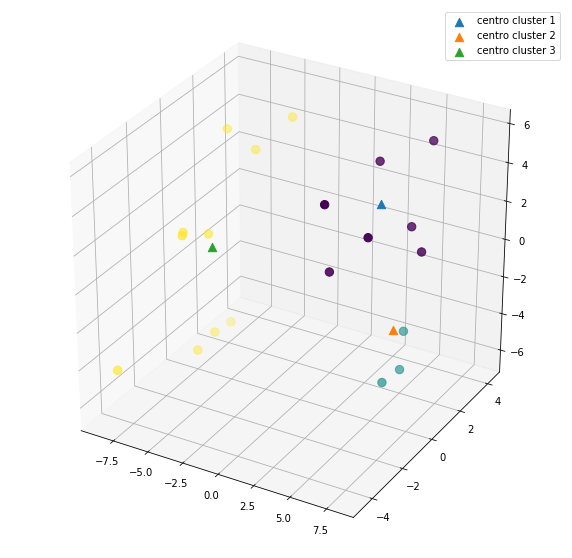

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['figure.figsize'] = 10,10
s = 70
ax.scatter(dataset[:,0], dataset[:,1], dataset[:,2], marker='o', c=comp.labels, s=s)
ax.scatter(centers[0,0],centers[0,1],centers[0,2], 'b', marker='^', s=s, label='centro cluster 1')
ax.scatter(centers[1,0],centers[1,1],centers[1,2], 'r', marker='^', s=s, label='centro cluster 2')
ax.scatter(centers[2,0],centers[2,1],centers[2,2], 'g', marker='^', s=s, label='centro cluster 3')
plt.legend()
plt.savefig("item_a_Q2.png", dpi=300)
plt.show()

In [7]:
init = np.array([[0,0,0],[1,1,1],[-1, 0, 2]], dtype=float)
#init = np.array([[-0.1,0,0.1],[0,-0.1,0.1],[-0.1,-0.1,0.1]])
comp = competitive(lr=0.01, init=init)
comp.fit(dataset, epoch=100)
centers = comp.w
print(f"Centros encontrados: \n{comp.w}")
print(f"n iter: {comp.n_iter}" )

Centros encontrados: 
[[-7.19363743 -0.51308443 -5.26871806]
 [ 6.05011162 -0.12193384  1.67993092]
 [-6.65700891  1.18548283  2.22430251]]
n iter: 5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


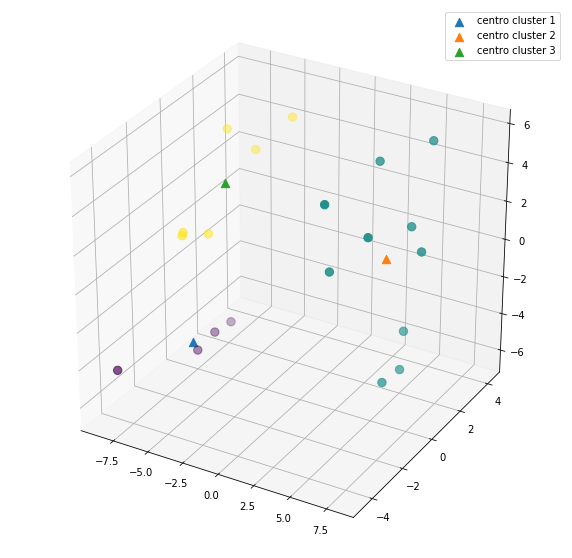

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['figure.figsize'] = 10,10
s = 70
ax.scatter(dataset[:,0], dataset[:,1], dataset[:,2], marker='o', c=comp.labels, s=s)
ax.scatter(centers[0,0],centers[0,1],centers[0,2], 'b', marker='^', s=s, label='centro cluster 1')
ax.scatter(centers[1,0],centers[1,1],centers[1,2], 'r', marker='^', s=s, label='centro cluster 2')
ax.scatter(centers[2,0],centers[2,1],centers[2,2], 'g', marker='^', s=s, label='centro cluster 3')
plt.legend()
plt.savefig("item_a_Q2.png", dpi=300)
plt.show()

In [9]:
#init = np.array([[0,0,0],[1,1,1],[-1, 0, 2]], dtype=float)
init = np.array([[-0.1,0,0.1],[0,-0.1,0.1],[-0.1,-0.1,0.1]])
comp = competitive(lr=0.01, init=init)
comp.fit(dataset, epoch=100)
print(f"Centros encontrados: \n{comp.w}")
print(f"n iter: {comp.n_iter}" )
centers = comp.w

Centros encontrados: 
[[-6.92129839  0.51086248 -0.77286325]
 [ 6.05006845 -0.12198133  1.67989207]
 [-0.1772     -0.1448      0.0593    ]]
n iter: 18


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


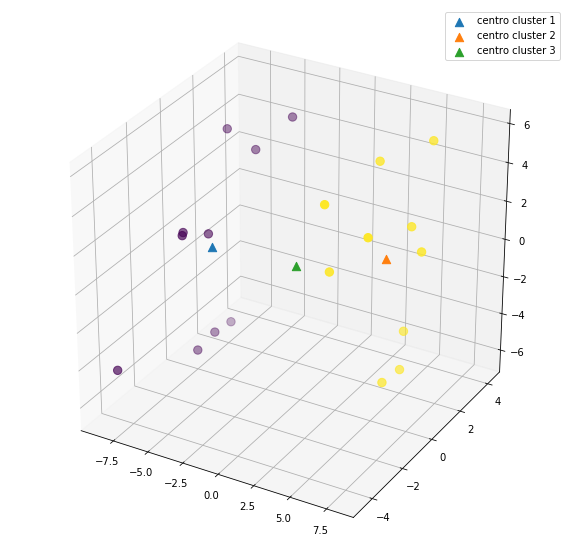

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['figure.figsize'] = 10,10
s = 70
ax.scatter(dataset[:,0], dataset[:,1], dataset[:,2], marker='o', c=comp.labels, s=s)
ax.scatter(centers[0,0],centers[0,1],centers[0,2], 'b', marker='^', s=s, label='centro cluster 1')
ax.scatter(centers[1,0],centers[1,1],centers[1,2], 'r', marker='^', s=s, label='centro cluster 2')
ax.scatter(centers[2,0],centers[2,1],centers[2,2], 'g', marker='^', s=s, label='centro cluster 3')
plt.legend()
plt.savefig("item_a_Q2.png", dpi=300)
plt.show()